In [8]:
import os
import numpy as np
import pandas as pd
train_df = pd.read_csv("train-balanced-sarcasm.csv")
train_df.head()


label                                            comment     author  \
0      0                                         NC and NH.  Trumpbart   
1      0  You do know west teams play against west teams...  Shbshb906   
2      0  They were underdogs earlier today, but since G...   Creepeth   
3      0  This meme isn't funny none of the "new york ni...  icebrotha   
4      0                    I could use one of those tools.  cush2push   

            subreddit  score  ups  downs     date          created_utc  \
0            politics      2   -1     -1  2016-10  2016-10-16 23:55:23   
1                 nba     -4   -1     -1  2016-11  2016-11-01 00:24:10   
2                 nfl      3    3      0  2016-09  2016-09-22 21:45:37   
3  BlackPeopleTwitter     -8   -1     -1  2016-10  2016-10-18 21:03:47   
4  MaddenUltimateTeam      6   -1     -1  2016-12  2016-12-30 17:00:13   

                                      parent_comment  
0  Yeah, I get that argument. At this point, I'd ...  
1  The blazers and Mavericks (The wests 5 and 6 s...  
2                            They're favored to win.  
3                         deadass don't kill my buzz  
4  Yep can confirm I saw the tool they use for th...

#### Some comments are missing, so we drop the corresponding rows.

In [9]:
train_df.dropna(subset=['comment'], inplace=True)
print(train_df.iloc[:, :-1].isnull().sum())
print(train_df.iloc[:,-1].isnull().sum())

label          0
comment        0
author         0
subreddit      0
score          0
ups            0
downs          0
date           0
created_utc    0
dtype: int64
0


In [10]:
train_df['label'].value_counts()

0    505405
1    505368
Name: label, dtype: int64

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt
train_texts, valid_texts, y_train, y_valid = \
        train_test_split(train_df['comment'], train_df['label'], random_state=17)

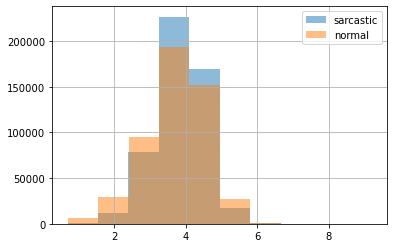

In [10]:
train_df.loc[train_df['label'] == 1, 'comment'].str.len().apply(np.log1p).hist(label='sarcastic', alpha=.5)
train_df.loc[train_df['label'] == 0, 'comment'].str.len().apply(np.log1p).hist(label='normal', alpha=.5)
plt.legend();

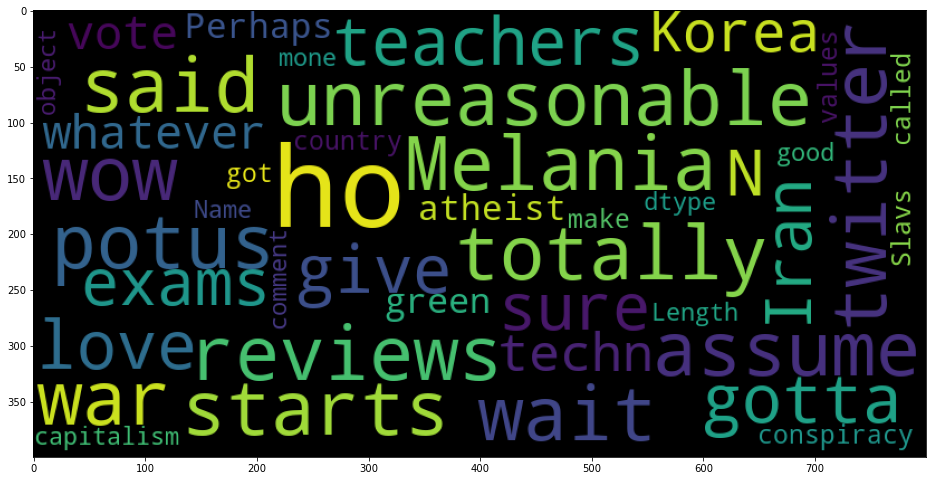

In [11]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(background_color='black', stopwords = STOPWORDS,
                max_words = 200, max_font_size = 100, 
                random_state = 17, width=800, height=400)
plt.figure(figsize=(16, 12))
wordcloud.generate(str(train_df.loc[train_df['label'] == 1, 'comment']))
plt.imshow(wordcloud);

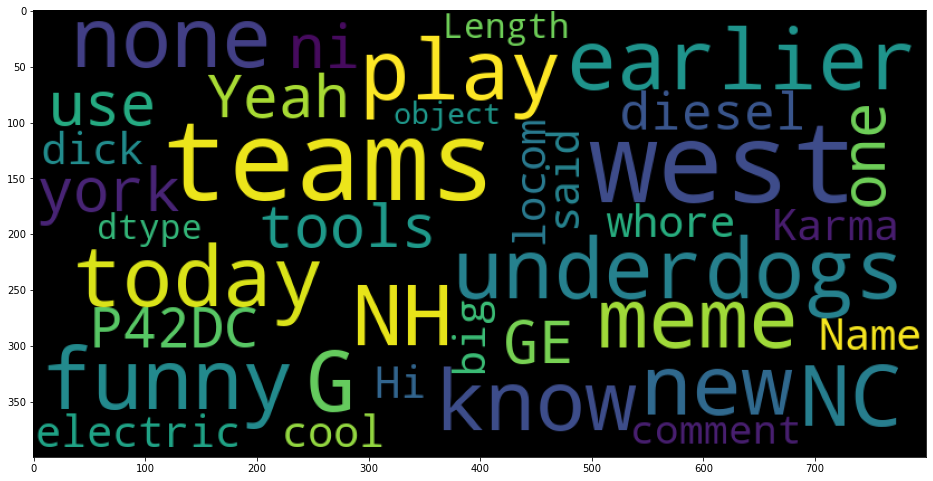

In [101]:
plt.figure(figsize=(16, 12))
wordcloud.generate(str(train_df.loc[train_df['label'] == 0, 'comment']))
plt.imshow(wordcloud);

In [16]:
sub_df = train_df.groupby('subreddit')['label'].agg([np.size, np.mean, np.sum])
sub_df.sort_values(by='sum', ascending=False).head(10)

size      mean    sum
subreddit                              
AskReddit        65674  0.401453  26365
politics         39493  0.605348  23907
worldnews        26376  0.642516  16947
leagueoflegends  21034  0.542312  11407
pcmasterrace     18987  0.566651  10759
news             16891  0.603457  10193
funny            17939  0.451474   8099
pics             16152  0.484336   7823
todayilearned    14159  0.547567   7753
GlobalOffensive  13738  0.552045   7584

In [17]:
sub_df[sub_df['size'] > 1000].sort_values(by='mean', ascending=False).head(10)


size      mean    sum
subreddit                              
creepyPMs         5466  0.784303   4287
MensRights        3355  0.680775   2284
ShitRedditSays    1284  0.661994    850
worldnews        26376  0.642516  16947
Libertarian       2562  0.640125   1640
atheism           7377  0.639555   4718
Conservative      1881  0.639553   1203
TwoXChromosomes   1560  0.632692    987
fatlogic          2356  0.623090   1468
facepalm          1268  0.617508    783

In [18]:
sub_df = train_df.groupby('author')['label'].agg([np.size, np.mean, np.sum])
sub_df[sub_df['size'] > 300].sort_values(by='mean', ascending=False).head(10)

size      mean  sum
author                             
NeonDisease      422  0.500000  211
ShyBiDude89      404  0.500000  202
ivsciguy         342  0.500000  171
mad-n-fla        318  0.500000  159
mindlessrabble   302  0.500000  151
pokemon_fetish   432  0.500000  216
Biffingston      845  0.499408  422

In [19]:
sub_df = train_df[train_df['score'] >= 0].groupby('score')['label'].agg([np.size, np.mean, np.sum])
sub_df[sub_df['size'] > 300].sort_values(by='mean', ascending=False).head(10)

size      mean    sum
score                        
0      58141  0.612752  35626
20      3096  0.561370   1738
34      1071  0.556489    596
26      1874  0.554429   1039
59       315  0.552381    174
18      3951  0.551759   2180
13      7277  0.546929   3980
17      4404  0.545867   2404
40       722  0.545706    394
27      1753  0.545351    956

In [20]:
sub_df = train_df[train_df['score'] < 0].groupby('score')['label'].agg([np.size, np.mean, np.sum])
sub_df[sub_df['size'] > 300].sort_values(by='mean', ascending=False).head(10)

size      mean   sum
score                       
-14      537  0.698324   375
-8      1852  0.696004  1289
-9      1503  0.691284  1039
-6      3088  0.688795  2127
-12      776  0.684278   531
-5      4134  0.678520  2805
-3      6736  0.676069  4554
-2     11924  0.675948  8060
-4      5436  0.673473  3661
-7      2424  0.672855  1631

####  Training the model

In [21]:
# build bigrams, put a limit on maximal number of features
# and minimal word frequency
tf_idf = TfidfVectorizer(ngram_range=(1, 2), max_features=50000, min_df=2)
# multinomial logistic regression a.k.a softmax classifier
logit = LogisticRegression(C=1, n_jobs=4, solver='lbfgs', 
                           random_state=17, verbose=1)
# sklearn's pipeline
tfidf_logit_pipeline = Pipeline([('tf_idf', tf_idf), 
                                 ('logit', logit)])

In [22]:
%%time
tfidf_logit_pipeline.fit(train_texts, y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:  1.2min finished


Wall time: 2min 33s


Pipeline(steps=[('tf_idf',
                 TfidfVectorizer(max_features=50000, min_df=2,
                                 ngram_range=(1, 2))),
                ('logit',
                 LogisticRegression(C=1, n_jobs=4, random_state=17,
                                    verbose=1))])

In [23]:
%%time
valid_pre = tfidf_logit_pipeline.predict(valid_texts)

Wall time: 18.4 s


In [24]:
accuracy_score(y_valid, valid_pre)

0.7207966948166558

In [28]:
    import itertools
import statsmodels.api as sm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
print(classification_report(y_valid,valid_pre))
print(confusion_matrix(y_valid,valid_pre))
print(accuracy_score(y_valid, valid_pre))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73    126308
           1       0.74      0.69      0.71    126386

    accuracy                           0.72    252694
   macro avg       0.72      0.72      0.72    252694
weighted avg       0.72      0.72      0.72    252694

[[95128 31180]
 [39373 87013]]
0.7207966948166558


In [29]:
def plot_confusion_matrix(actual, predicted, classes,
                          normalize=False,
                          title='Confusion matrix', figsize=(7,7),
                          cmap=plt.cm.Blues, path_to_save_fig=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(actual, predicted).T
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=figsize)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label')
    
    if path_to_save_fig:
        plt.savefig(path_to_save_fig, dpi=300, bbox_inches='tight')

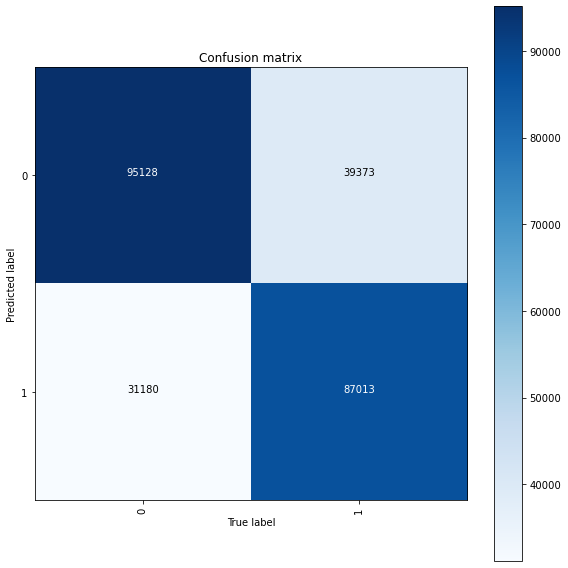

In [31]:
plot_confusion_matrix(y_valid, valid_pre, 
                      tfidf_logit_pipeline.named_steps['logit'].classes_, figsize=(8, 8))

In [32]:
print(valid_pre)
for i in valid_pre:
    print(valid_pre[i])
    if i==0:
        print("not sarcastic")
    else:
        print("sarcastic")

[0 1 0 ... 0 1 1]
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcasti

1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcas

not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcasti

1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sa

sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcasti

0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic


0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic


sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcasti

sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarc

0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic


1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcas

0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic


not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1


1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
no

not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarc

0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcas

not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1


0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcas

sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0


not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarc

1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sa

sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0


sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarc

0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic


sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not 

1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic


not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarc

not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcasti

1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic


not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0


1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcas

0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcas

not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcasti

0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sa

not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcasti

sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0


0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
no

not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not 

not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcasti

not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not 

0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic


sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not 

0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sa

sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarc

0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic


0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sa

not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarc

1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcas

sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarc

not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcasti

not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcasti

0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcas

sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1


1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic


sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarc

0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcas

1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sa

1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic


not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarc

not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcasti

not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarc

0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sa

not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcasti

1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcas

sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarc

0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic


not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcasti

0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic


1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcas

not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarc

1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sa

1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcas

not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcasti

0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sa

not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0


1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sa

not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not 

not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarc

0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcas

not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1


not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarc

not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1


not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarc

sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not 

0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcas

sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0


1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
no

sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcasti

1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcas

not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not 

1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic


sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcasti

1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcas

sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not 

0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcas

not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1


1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcas

sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarc

1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcas

1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic


sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcasti

not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarc

0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic


sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcasti

0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic


sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarc

0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic


sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarc

sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcasti

0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sa

0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcas

not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarc

1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
no

sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1


1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
no

0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
no

not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not 

not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1


1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
no

not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0


1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic


sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcasti

1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcas

sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcasti

1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcas

1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcas

0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
no

sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarc

1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic


sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarc

1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sa

sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0


0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sa

sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1


0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcas

0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
no

not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not 

not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarc

1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
no

not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarc

1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sa

not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarc

0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcas

not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1


sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0


1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
no

sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcasti

sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not 

1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcas

not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcasti

1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
no

not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcasti

not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarc

not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0


1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcas

sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarc

0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic


sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0


1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic


not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcasti

0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sa

not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarc

1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
no

0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcas

0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic


not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not 

0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
no

not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0


1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
no

not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarc

sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcasti

not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcasti

sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcasti

0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic


sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not 

0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcas

not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not 

sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1


not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0


1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sa

sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcasti

1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sa

not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarc

0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic


not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1


1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sa

not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarc

0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
no

not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarc

0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
no

not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1


0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sa

not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not 

1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
no

sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcasti

0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic


0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sa

1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcas

not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not 

1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
no

sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0


0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic


sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcasti

not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarc

0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sa

not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcasti

1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sa

0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic


sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not 

1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
no

sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0


1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcas

not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1


sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcasti

0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
no

0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcas

sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarc

0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
no

sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0


1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic


0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcas

1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
no

not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0


1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
no

1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcas

not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcasti

0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic


not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not 

0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sa

not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarc

0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcas

1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
no

1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcas

not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarc

1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sa

not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcasti

1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic


1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sa

sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarc

not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarc

0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcas

sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarc

0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic


not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcasti

1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcas

not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not 

0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcas

sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarc

sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcasti

0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcas

sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0


0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
no

sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not 

not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarc

not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcasti

sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcasti

0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
no

sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1


0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sa

sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0


not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarc

1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic


0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
no

not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarc

1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
no

sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1


1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
no

not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcasti

1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic


sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0


not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcasti

0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sa

sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1


0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcas

sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not 

0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcas

0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcas

not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarc

0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic


1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic


not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcasti

1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sa

sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarc

0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sa

sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcasti

1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sa

sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarc

1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcas

sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
1
sarcastic
1
sarcastic
0
not sarcastic
0
not sarc

In [33]:
import eli5
eli5.show_weights(estimator=tfidf_logit_pipeline.named_steps['logit'],
                  vec=tfidf_logit_pipeline.named_steps['tf_idf'])

In [34]:
print(valid_texts)

469600    Starting to feel pretty fucking tired of all t...
639137    It's like that label actually has no meaning b...
240293    Mained Fiora - Reworked Mained AP Tristana - W...
702254    Yeah lol that's right they wouldn't let black ...
889040              No, he made the thread asking jokingly.
                                ...                        
23988     Well the devs kind of stopped working on the o...
408769           totally balanced, not game breaking at all
688966    No amount of money can take that experience away.
107936    But guys, you only think D2 was good because o...
767875    BUT HE'S A CAREER THIRD LINER AND WE SHOULD DU...
Name: comment, Length: 252694, dtype: object


In [35]:
a = "['yeah','sure']"
a=[a]
prediction=tfidf_logit_pipeline.predict(a)

In [36]:
print(prediction)

[1]


In [37]:
text_transformer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), lowercase=True, max_features=150000)

In [38]:
X_train_text = text_transformer.fit_transform(train_texts)
X_test_text = text_transformer.transform(valid_texts)

In [39]:
logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='multinomial', random_state=17, n_jobs=4)
logit.fit(X_train_text,y_train)

LogisticRegression(C=50.0, multi_class='multinomial', n_jobs=4, random_state=17)

In [41]:
valid_pred = logit.predict(X_test_text)

In [42]:
accuracy_score(y_valid, valid_pred)

0.6746460145472389

In [43]:
user=input("enter your text")
prediction=logit.predict(text_transformer.transform([user]))

enter your textwhat a weather!


In [44]:
print(prediction)

[0]


In [ ]:
print(classification_report(y_valid,valid_pred))
cf=confusion_matrix(y_valid,valid_pred)
print(confusion_matrix(y_valid,valid_pred))
print(accuracy_score(y_valid, valid_pred))

<AxesSubplot:>

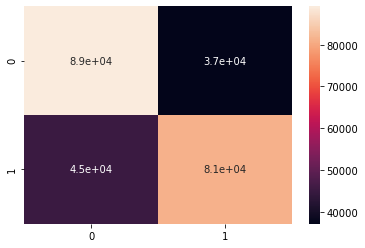

In [56]:
import seaborn as sns
sns.heatmap(cf, annot=True)

In [46]:
import pickle
# Saving model to disk
pickle.dump(logit, open('smodel.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('smodel.pkl','rb'))